In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_mem_available = pd.read_csv("baseline/mem_available.csv")
df_baseline_mem_cache = pd.read_csv("baseline/mem_cache.csv")
df_baseline_mem_util = pd.read_csv("baseline/mem_util.csv")

# Load CPU STRESS datasets
df_cpustress_mem_available = pd.read_csv("cpu stress/mem_available.csv")
df_cpustress_mem_cache = pd.read_csv("cpu stress/mem_cache.csv")
df_cpustress_mem_util = pd.read_csv("cpu stress/mem_util.csv")

# Load DELAY datasets
df_delay_mem_available = pd.read_csv("delay/mem_available.csv")
df_delay_mem_cache = pd.read_csv("delay/mem_cache.csv")
df_delay_mem_util = pd.read_csv("delay/mem_util.csv")

# Load MEM STRESS datasets
df_memstress_mem_available = pd.read_csv("mem stress/mem_available.csv")
df_memstress_mem_cache = pd.read_csv("mem stress/mem_cache.csv")
df_memstress_mem_util = pd.read_csv("mem stress/mem_util.csv")

# Load NET LOSS datasets
df_netloss_mem_available = pd.read_csv("netloss/mem_available.csv")
df_netloss_mem_cache = pd.read_csv("netloss/mem_cache.csv")
df_netloss_mem_util = pd.read_csv("netloss/mem_util.csv")


# Add source labels - BASELINE
df_baseline_mem_available["source"] = "BASELINE"
df_baseline_mem_cache["source"] = "BASELINE"
df_baseline_mem_util["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_mem_available["source"] = "CPU_STRESS"
df_cpustress_mem_cache["source"] = "CPU_STRESS"
df_cpustress_mem_util["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_delay_mem_available["source"] = "DELAY"
df_delay_mem_cache["source"] = "DELAY"
df_delay_mem_util["source"] = "DELAY"

# Add source labels - MEM STRESS
df_memstress_mem_available["source"] = "MEM_STRESS"
df_memstress_mem_cache["source"] = "MEM_STRESS"
df_memstress_mem_util["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_mem_available["source"] = "NET_LOSS"
df_netloss_mem_cache["source"] = "NET_LOSS"
df_netloss_mem_util["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_mem_available["Time"] = pd.to_datetime(df_baseline_mem_available["Time"])
df_baseline_mem_cache["Time"] = pd.to_datetime(df_baseline_mem_cache["Time"])
df_baseline_mem_util["Time"] = pd.to_datetime(df_baseline_mem_util["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_mem_available["Time"] = pd.to_datetime(df_cpustress_mem_available["Time"])
df_cpustress_mem_cache["Time"] = pd.to_datetime(df_cpustress_mem_cache["Time"])
df_cpustress_mem_util["Time"] = pd.to_datetime(df_cpustress_mem_util["Time"])

# Convert to datetime - DELAY
df_delay_mem_available["Time"] = pd.to_datetime(df_delay_mem_available["Time"])
df_delay_mem_cache["Time"] = pd.to_datetime(df_delay_mem_cache["Time"])
df_delay_mem_util["Time"] = pd.to_datetime(df_delay_mem_util["Time"])

# Convert to datetime - MEM STRESS
df_memstress_mem_available["Time"] = pd.to_datetime(df_memstress_mem_available["Time"])
df_memstress_mem_cache["Time"] = pd.to_datetime(df_memstress_mem_cache["Time"])
df_memstress_mem_util["Time"] = pd.to_datetime(df_memstress_mem_util["Time"])

# Convert to datetime - NET LOSS
df_netloss_mem_available["Time"] = pd.to_datetime(df_netloss_mem_available["Time"])
df_netloss_mem_cache["Time"] = pd.to_datetime(df_netloss_mem_cache["Time"])
df_netloss_mem_util["Time"] = pd.to_datetime(df_netloss_mem_util["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_mem_available["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_mem_available["Time"].min()
df_cpustress_mem_available["Time"] += cpustress_offset
df_cpustress_mem_cache["Time"] += cpustress_offset
df_cpustress_mem_util["Time"] += cpustress_offset

# Synchronize DELAY datasets
delay_offset = time_offset - df_delay_mem_available["Time"].min()
df_delay_mem_available["Time"] += delay_offset
df_delay_mem_cache["Time"] += delay_offset
df_delay_mem_util["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_mem_available["Time"].min()
df_memstress_mem_available["Time"] += memstress_offset
df_memstress_mem_cache["Time"] += memstress_offset
df_memstress_mem_util["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_mem_available["Time"].min()
df_netloss_mem_available["Time"] += netloss_offset
df_netloss_mem_cache["Time"] += netloss_offset
df_netloss_mem_util["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_mem_available, df_baseline_mem_cache, df_baseline_mem_util,
    # CPU Stress
    df_cpustress_mem_available, df_cpustress_mem_cache, df_cpustress_mem_util,
    # Delay
    df_delay_mem_available, df_delay_mem_cache, df_delay_mem_util,
    # Memory Stress
    df_memstress_mem_available, df_memstress_mem_cache, df_memstress_mem_util,
    # Network Loss
    df_netloss_mem_available, df_netloss_mem_cache, df_netloss_mem_util
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'MemAvailable': {
        'baseline': df_baseline_mem_available,
        'cpu_stress': df_cpustress_mem_available,
        'delay': df_delay_mem_available,
        'mem_stress': df_memstress_mem_available,
        'net_loss': df_netloss_mem_available,
    },
    'MemCache': {
        'baseline': df_baseline_mem_cache,
        'cpu_stress': df_cpustress_mem_cache,
        'delay': df_delay_mem_cache,
        'mem_stress': df_memstress_mem_cache,
        'net_loss': df_netloss_mem_cache,
    },
    'MemUtil': {
        'baseline': df_baseline_mem_util,
        'cpu_stress': df_cpustress_mem_util,
        'delay': df_delay_mem_util,
        'mem_stress': df_memstress_mem_util,
        'net_loss': df_netloss_mem_util,
    }
}

print("✅ All memory datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} memory metrics across {len(all_datasets['MemAvailable'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All memory datasets loaded successfully!
📊 Loaded 3 memory metrics across 5 experiment types

Dataset structure:
  MemAvailable: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  MemCache: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  MemUtil: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']


🚀 Starting TUNA column-by-column processing...

🔄 Processing metric: MemAvailable
  📊 Data columns: ['mem_available']
    🤖 Training model for column: mem_available
  🔄 Processing experiment: baseline
  🔄 Processing experiment: cpu_stress
  🔄 Processing experiment: delay
  🔄 Processing experiment: mem_stress
  🔄 Processing experiment: net_loss

🔄 Processing metric: MemCache
  📊 Data columns: ['mem_cache']
    🤖 Training model for column: mem_cache
  🔄 Processing experiment: baseline
  🔄 Processing experiment: cpu_stress
  🔄 Processing experiment: delay
  🔄 Processing experiment: mem_stress
  🔄 Processing experiment: net_loss

🔄 Processing metric: MemUtil
  📊 Data columns: ['mem_util']
    🤖 Training model for column: mem_util
  🔄 Processing experiment: baseline
  🔄 Processing experiment: cpu_stress
  🔄 Processing experiment: delay
  🔄 Processing experiment: mem_stress
  🔄 Processing experiment: net_loss


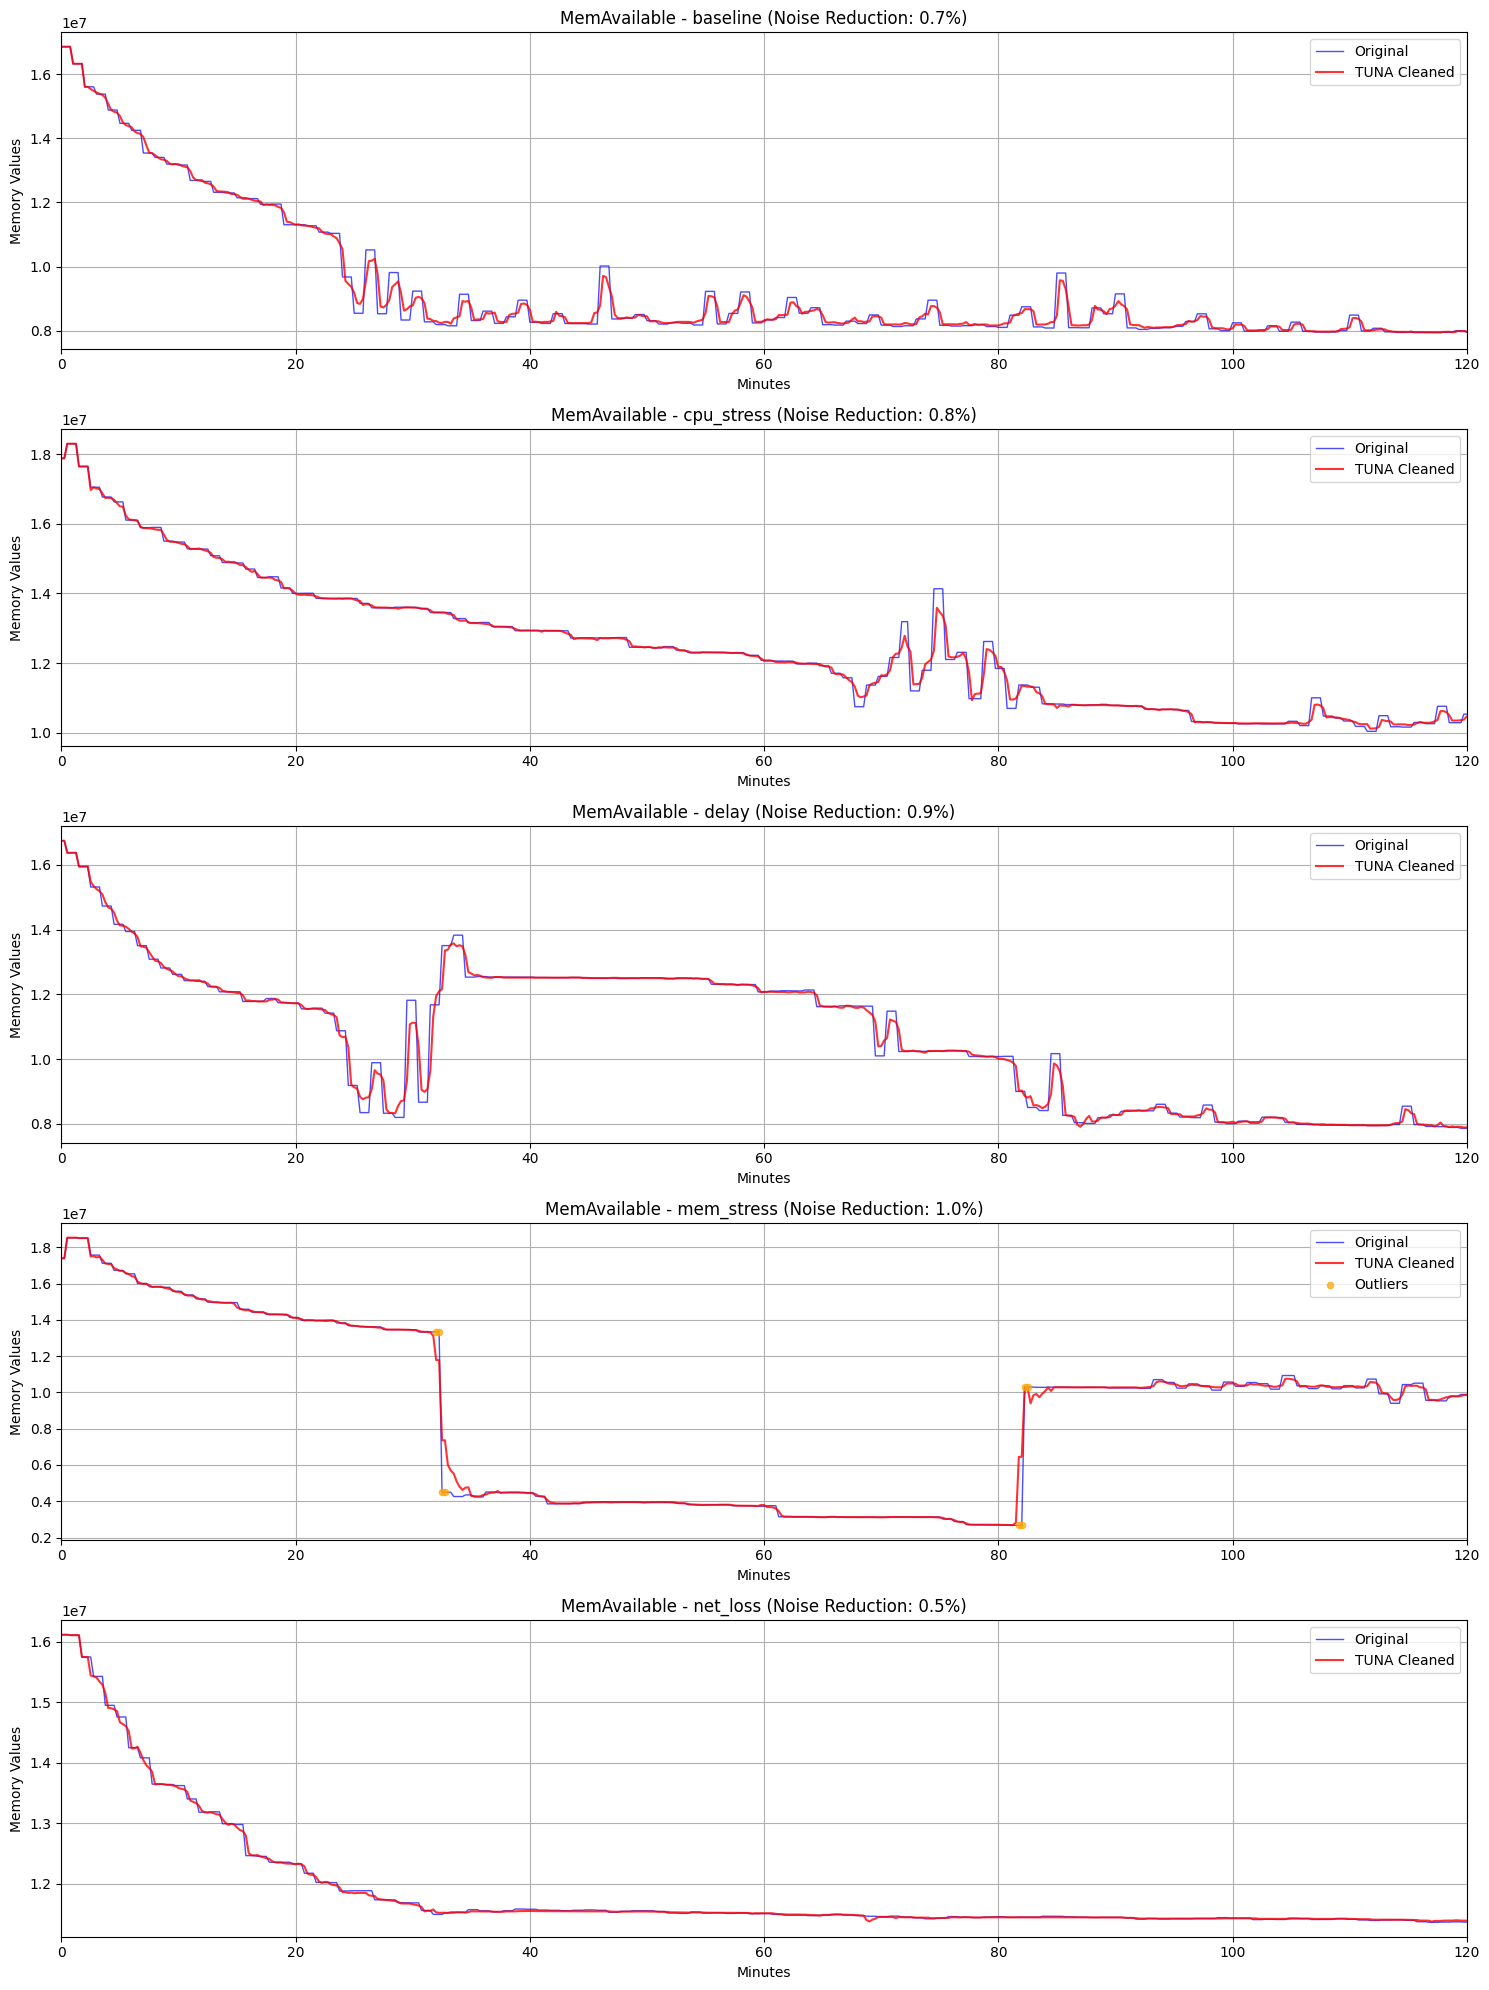

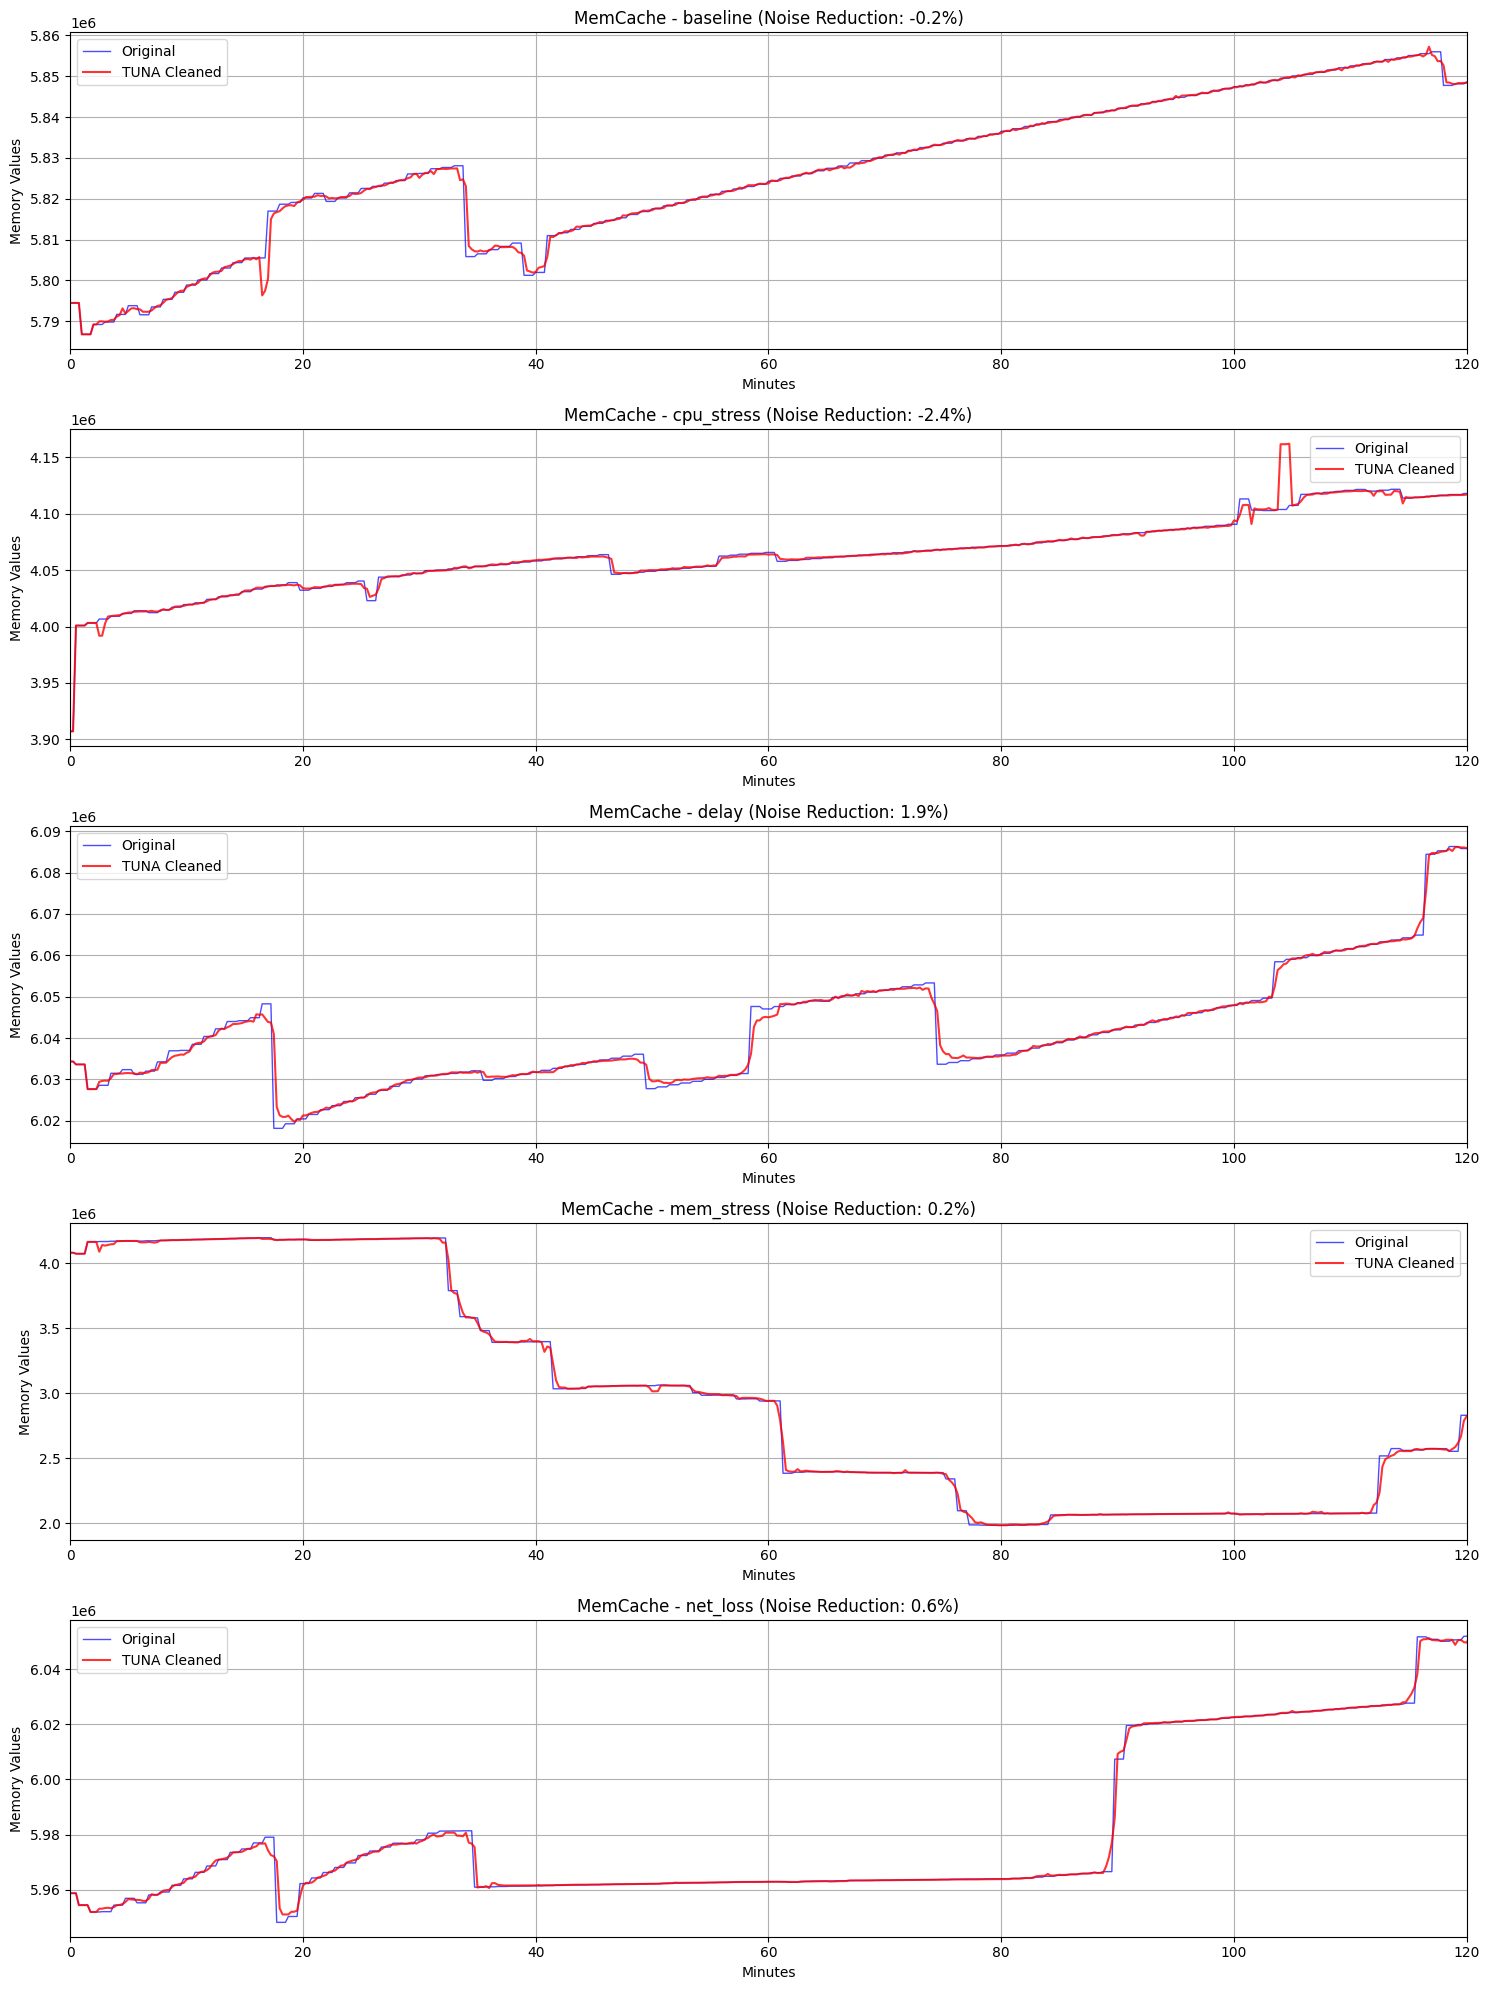

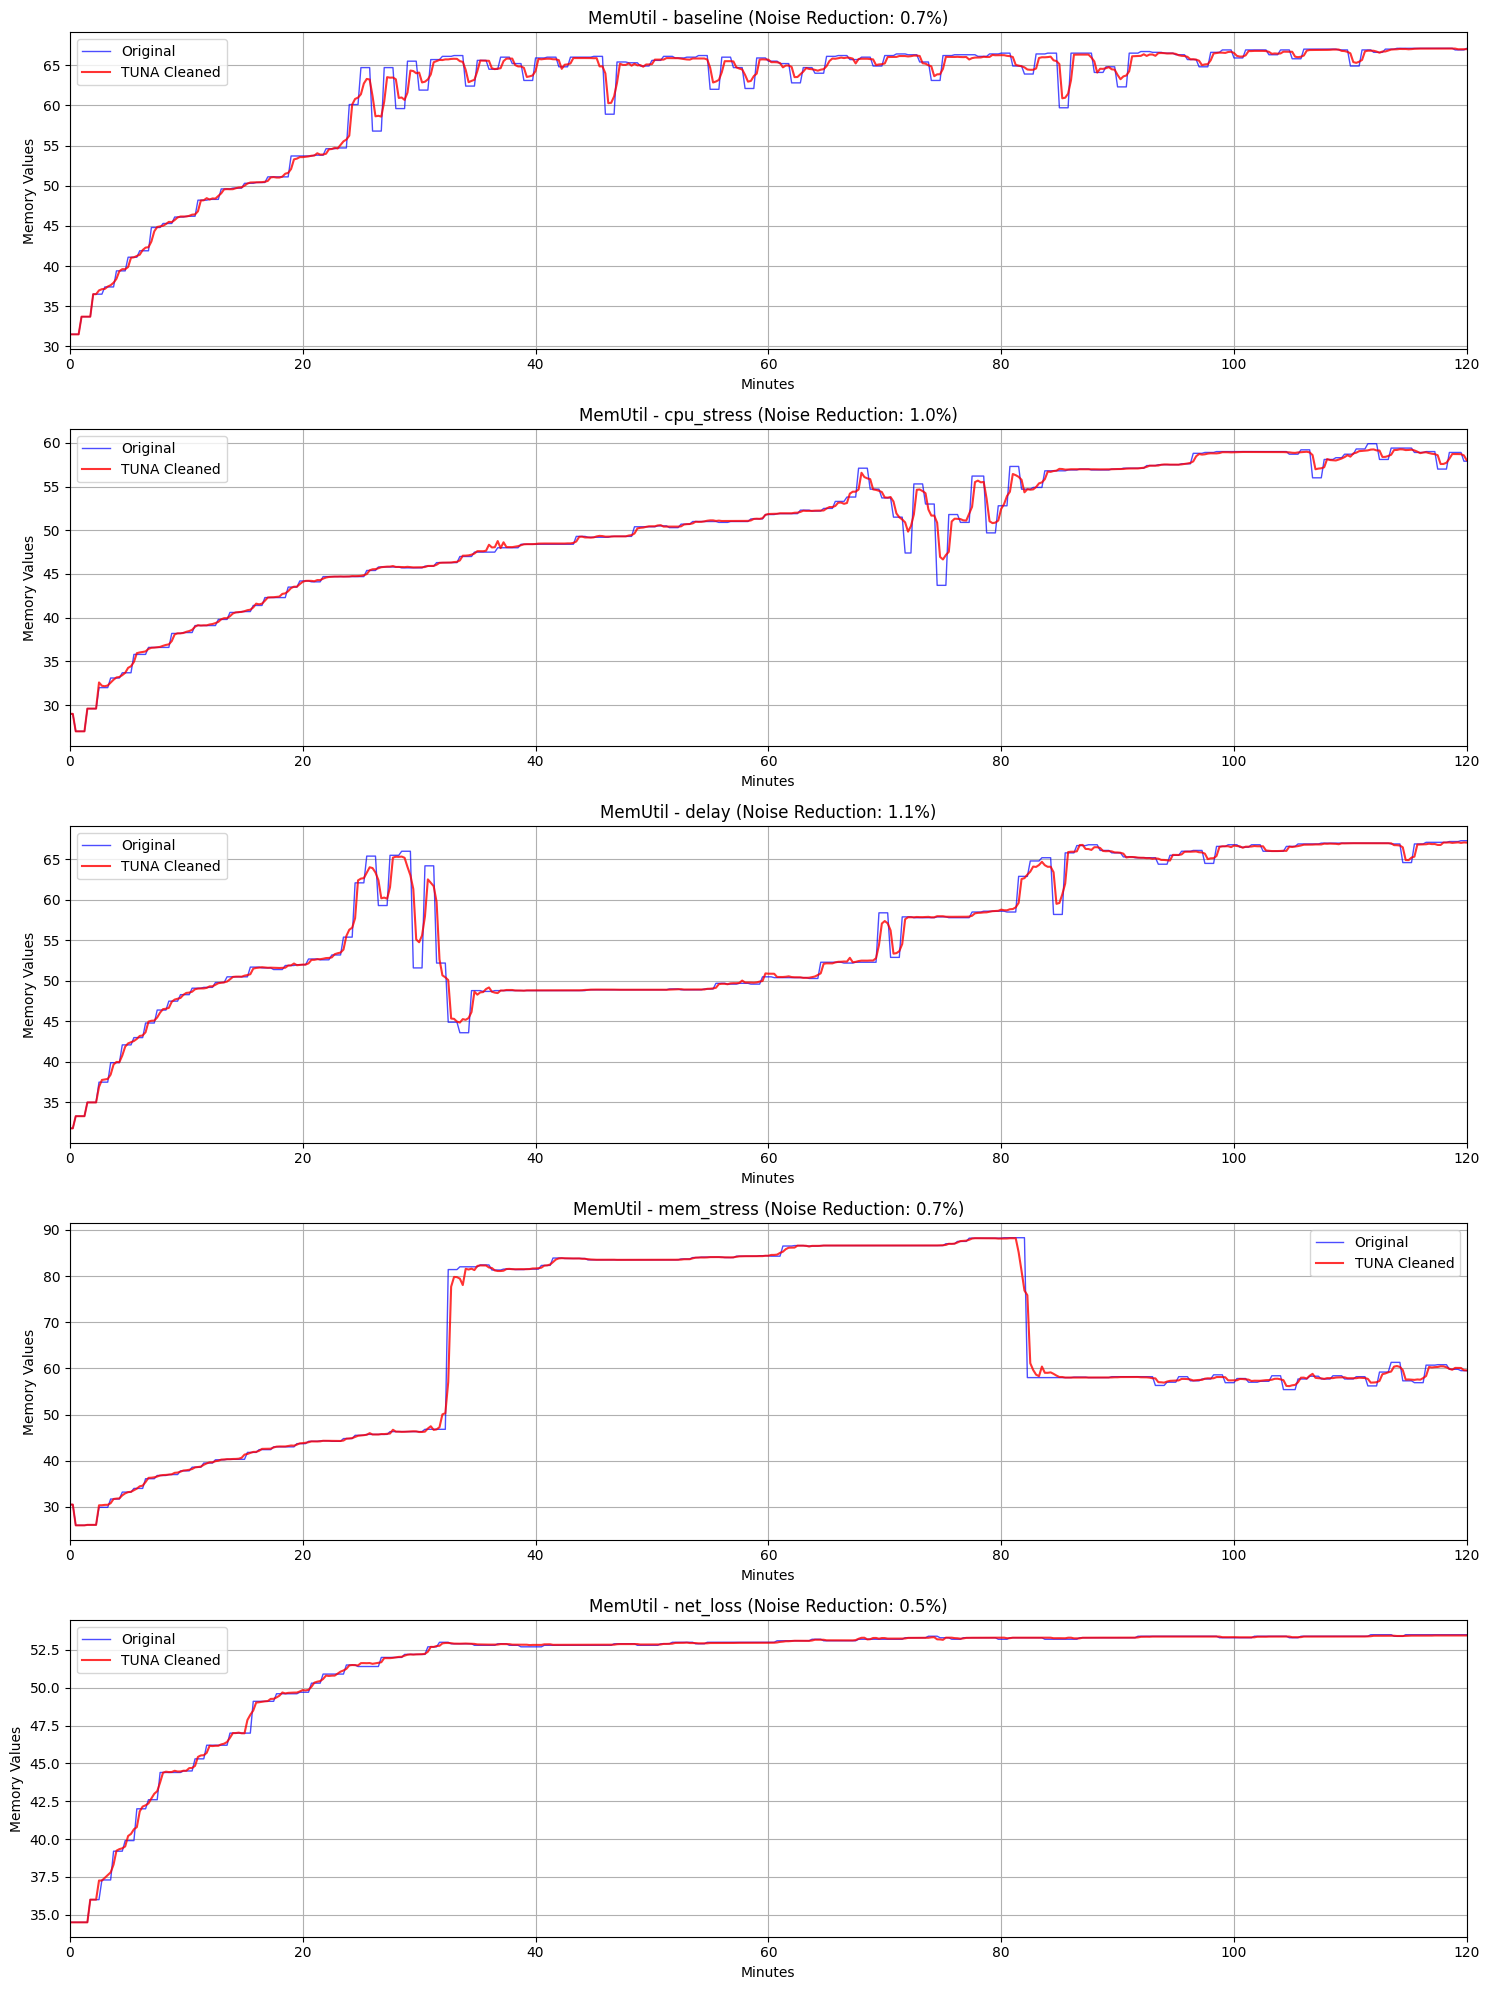


Column-by-Column TUNA Results Summary:
Metric          Experiment   Column          Outliers   Noise Red%   Correlation 
--------------------------------------------------------------------------------
MemAvailable    baseline     mem_available   0                 0.7%       0.995
MemAvailable    cpu_stress   mem_available   0                 0.8%       0.996
MemAvailable    delay        mem_available   0                 0.9%       0.992
MemAvailable    mem_stress   mem_available   8                 1.0%       0.997
MemAvailable    net_loss     mem_available   0                 0.5%       0.999
MemCache        baseline     mem_cache       0                -0.2%       0.997
MemCache        cpu_stress   mem_cache       0                -2.4%       0.985
MemCache        delay        mem_cache       0                 1.9%       0.994
MemCache        mem_stress   mem_cache       0                 0.2%       0.999
MemCache        net_loss     mem_cache       0                 0.6%       0.9

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from pathlib import Path
from typing import Dict, Any, List, Optional
import warnings
warnings.filterwarnings('ignore')

def safe_convert_to_float(series):
    try:
        return pd.to_numeric(series, errors='coerce').fillna(0.0).astype(float)
    except:
        return series.fillna(0.0).astype(float)

def safe_array_conversion(data):
    data = np.array(data, dtype=float)
    if np.any(np.isnan(data)):
        median_val = np.nanmedian(data)
        if np.isnan(median_val):
            median_val = 0.0
        data = np.nan_to_num(data, nan=median_val)
    return data

def get_data_columns(df):
    """Get columns that contain actual data (excluding time/metadata columns)"""
    exclude_cols = ['Time', 'Minutes', 'source']
    return [col for col in df.columns if col not in exclude_cols]

def detect_outliers_tuna(timeseries, window_size=3, threshold=0.65, min_absolute_range=None):
    timeseries = safe_array_conversion(timeseries)
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    
    if min_absolute_range is None:
        std_val = np.std(timeseries)
        if std_val == 0 or np.isnan(std_val):
            min_absolute_range = 0.01 * np.max(timeseries)
        else:
            min_absolute_range = 0.1 * std_val
    
    if min_absolute_range <= 0:
        min_absolute_range = 1e-6
    
    for i in range(len(timeseries) - window_size + 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0 and window_range > 0:
            relative_range = window_range / window_mean
            
            if relative_range > threshold and window_range > min_absolute_range:
                window_max = np.max(window)
                window_min = np.min(window)
                
                for j in range(window_size):
                    actual_idx = i + j
                    if (timeseries[actual_idx] == window_max or 
                        timeseries[actual_idx] == window_min):
                        outlier_mask[actual_idx] = True
    
    return outlier_mask

def create_features_for_ml(timeseries, experiment_type, window_size=10):
    timeseries = safe_array_conversion(timeseries)
    features = []
    
    for i in range(window_size, len(timeseries)):
        window = timeseries[i-window_size:i]
        
        feature_vector = [
            np.mean(window),
            np.std(window),
            np.median(window),
            np.max(window) - np.min(window),
            timeseries[i-1],
            i / len(timeseries),
        ]
        
        feature_vector = [0.0 if np.isnan(val) or np.isinf(val) else float(val) for val in feature_vector]
        
        exp_features = [0, 0, 0, 0, 0]
        if experiment_type == "baseline":
            exp_features[0] = 1
        elif experiment_type == "cpu_stress":
            exp_features[1] = 1
        elif experiment_type == "delay":
            exp_features[2] = 1
        elif experiment_type == "mem_stress":
            exp_features[3] = 1
        elif experiment_type == "net_loss":
            exp_features[4] = 1
        
        feature_vector.extend(exp_features)
        features.append(feature_vector)
    
    return np.array(features)

def train_random_forest_for_column(column_name, column_data_dict, experiments_dict):
    """Train a random forest model for a specific column across all experiments"""
    X_stable_all = []
    y_stable_all = []
    
    for exp_name, column_values in column_data_dict.items():
        column_values = safe_array_conversion(column_values)
        
        outlier_mask = detect_outliers_tuna(column_values)
        stable_mask = ~outlier_mask
        
        features = create_features_for_ml(column_values, exp_name)
        if len(features) > 0:
            stable_features_mask = stable_mask[10:10+len(features)]
            stable_features = features[stable_features_mask]
            stable_targets = column_values[10:10+len(features)][stable_features_mask]
            
            valid_mask = ~(np.isnan(stable_targets) | np.isinf(stable_targets))
            stable_features = stable_features[valid_mask]
            stable_targets = stable_targets[valid_mask]
            
            if len(stable_features) > 0:
                smoothed_targets = []
                for j, target in enumerate(stable_targets):
                    start_idx = max(0, j-2)
                    end_idx = min(len(stable_targets), j+3)
                    local_values = stable_targets[start_idx:end_idx]
                    smoothed_targets.append(np.median(local_values))
                
                X_stable_all.extend(stable_features)
                y_stable_all.extend(smoothed_targets)
    
    if len(X_stable_all) < 10:
        return None, None
    
    X_stable_all = np.array(X_stable_all)
    y_stable_all = np.array(y_stable_all)
    
    # Clean NaN values
    nan_mask = np.isnan(y_stable_all) | np.isinf(y_stable_all)
    if np.any(nan_mask):
        X_stable_all = X_stable_all[~nan_mask]
        y_stable_all = y_stable_all[~nan_mask]
    
    feature_nan_mask = np.isnan(X_stable_all).any(axis=1) | np.isinf(X_stable_all).any(axis=1)
    if np.any(feature_nan_mask):
        X_stable_all = X_stable_all[~feature_nan_mask]
        y_stable_all = y_stable_all[~feature_nan_mask]
    
    if len(X_stable_all) < 10:
        return None, None
    
    try:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_stable_all)

        model = RandomForestRegressor(
            n_estimators=50,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            random_state=42,
            n_jobs=1
        )
        
        model.fit(X_scaled, y_stable_all)
        return model, scaler
    except Exception:
        return None, None

def apply_penalty(timeseries, outlier_mask, penalty_factor=0.5):
    timeseries = safe_array_conversion(timeseries)
    cleaned_series = timeseries.copy()
    
    stable_values = timeseries[~outlier_mask]
    if len(stable_values) > 0:
        baseline = np.median(stable_values)
    else:
        baseline = np.median(timeseries)
    
    if np.isnan(baseline):
        baseline = 0.0
    
    for i in range(len(timeseries)):
        if outlier_mask[i]:
            original_value = timeseries[i]
            if np.isnan(original_value):
                cleaned_series[i] = baseline
            else:
                cleaned_series[i] = baseline + (original_value - baseline) * penalty_factor
    
    return cleaned_series

def apply_tuna_to_single_column(column_values, exp_name, model, scaler, penalty_factor=0.5):
    """Apply TUNA to a single column"""
    column_values = safe_array_conversion(column_values)
    
    outlier_mask = detect_outliers_tuna(column_values)
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    cleaned_series = apply_penalty(column_values, outlier_mask, penalty_factor)
    
    if model is not None and scaler is not None:
        try:
            features = create_features_for_ml(column_values, exp_name)
            if len(features) > 0:
                features_scaled = scaler.transform(features)
                ml_predictions = model.predict(features_scaled)
                
                for i, prediction in enumerate(ml_predictions):
                    actual_idx = i + 10
                    if actual_idx < len(cleaned_series) and stable_mask[actual_idx]:
                        if not np.isnan(prediction) and not np.isinf(prediction):
                            cleaned_series[actual_idx] = prediction
        except Exception:
            pass
    
    original_std = np.std(column_values)
    cleaned_std = np.std(cleaned_series)
    
    if original_std > 0 and not np.isnan(original_std):
        noise_reduction = (original_std - cleaned_std) / original_std * 100
    else:
        noise_reduction = 0.0
    
    if len(column_values) > 1:
        correlation = np.corrcoef(column_values, cleaned_series)[0, 1]
        if np.isnan(correlation):
            correlation = 1.0
    else:
        correlation = 1.0
    
    cleaning_stats = {
        'outliers': outliers_count,
        'outlier_percentage': (outliers_count / len(column_values)) * 100,
        'noise_reduction': noise_reduction,
        'correlation': correlation
    }
    
    return cleaned_series, outlier_mask, cleaning_stats

def run_tuna_for_all_metrics_column_by_column(all_datasets):
    """Run TUNA processing column by column for all metrics"""
    tuna_results = {}
    
    for metric_name, experiments in all_datasets.items():
        print(f"\n🔄 Processing metric: {metric_name}")
        
        # Get all data columns for this metric
        sample_df = next(iter(experiments.values()))
        data_columns = get_data_columns(sample_df)
        
        print(f"  📊 Data columns: {data_columns}")
        
        # Train models for each column
        column_models = {}
        for col in data_columns:
            print(f"    🤖 Training model for column: {col}")
            
            # Collect column data across all experiments
            column_data_dict = {}
            for exp_name, df in experiments.items():
                if col in df.columns:
                    column_data_dict[exp_name] = safe_convert_to_float(df[col])
            
            if column_data_dict:
                model, scaler = train_random_forest_for_column(col, column_data_dict, experiments)
                column_models[col] = (model, scaler)
            else:
                column_models[col] = (None, None)
        
        # Process each experiment
        metric_results = {}
        for exp_name, df in experiments.items():
            print(f"  🔄 Processing experiment: {exp_name}")
            
            column_results = {}
            overall_stats = {'outliers': 0, 'noise_reduction': 0.0, 'correlation': 0.0}
            
            # Process each column
            for col in data_columns:
                if col in df.columns:
                    column_values = safe_convert_to_float(df[col])
                    model, scaler = column_models[col]
                    
                    cleaned_series, outlier_mask, stats = apply_tuna_to_single_column(
                        column_values, exp_name, model, scaler
                    )
                    
                    column_results[col] = {
                        'original': column_values.values,
                        'cleaned': cleaned_series,
                        'outliers': outlier_mask,
                        'stats': stats
                    }
                    
                    # Accumulate overall stats
                    overall_stats['outliers'] += stats['outliers']
                    overall_stats['noise_reduction'] += stats['noise_reduction']
                    overall_stats['correlation'] += stats['correlation']
            
            # Average the overall stats
            if len(column_results) > 0:
                overall_stats['noise_reduction'] /= len(column_results)
                overall_stats['correlation'] /= len(column_results)
            
            metric_results[exp_name] = {
                'column_results': column_results,
                'stats': overall_stats
            }
        
        tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results_column_by_column(tuna_results, all_datasets):
    """Plot results for column-by-column processing - using same format as original"""
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4 * n_experiments))

        if n_experiments == 1:
            axes = [axes]

        for i, (exp_name, results) in enumerate(metric_results.items()):
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values

            # For column-by-column, we'll plot the first/main column or aggregate if multiple
            column_results = results['column_results']

            if len(column_results) == 1:
                # Single column - plot directly
                col_name = list(column_results.keys())[0]
                col_results = column_results[col_name]
                original = col_results['original']
                cleaned = col_results['cleaned']
                outliers = col_results['outliers']
                stats = col_results['stats']
            else:
                # Multiple columns - take the first for visualization (or could average)
                col_name = list(column_results.keys())[0]
                col_results = column_results[col_name]
                original = col_results['original']
                cleaned = col_results['cleaned']
                outliers = col_results['outliers']
                stats = results['stats']  # Use overall stats for title

            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, 'r-', alpha=0.8, label='TUNA Cleaned', linewidth=1.5)

            outlier_points = np.where(outliers)[0]
            if len(outlier_points) > 0:
                axes[i].scatter(minutes[outlier_points], original[outlier_points],
                                c='orange', s=20, alpha=0.7, label='Outliers', zorder=5)

            # Determine y-label based on metric type
            if 'srtt' in metric_name.lower():
                y_label = 'SRTT Values'
            elif any(service in metric_name.lower() for service in ['apigateway', 'customers', 'visits', 'vets']):
                y_label = 'Retransmission Packets'
            elif 'mem' in metric_name.lower():
                y_label = 'Memory Values'
            else:
                y_label = 'Values'

            axes[i].set_title(f'{metric_name} - {exp_name} (Noise Reduction: {stats["noise_reduction"]:.1f}%)')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120)
            axes[i].legend()
            axes[i].grid(True)

        plt.tight_layout()
        plt.show()

def print_tuna_summary_column_by_column(tuna_results):
    """Print summary for column-by-column processing"""
    print("\nColumn-by-Column TUNA Results Summary:")
    print("="*80)
    print(f"{'Metric':<15} {'Experiment':<12} {'Column':<15} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*80)
    
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            for col_name, col_results in results['column_results'].items():
                stats = col_results['stats']
                print(f"{metric_name:<15} {exp_name:<12} {col_name:<15} {stats['outliers']:<10} "
                      f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

def create_cleaned_csv_from_tuna_columns(original_df, column_results, metric_name, experiment_name, include_metadata=False):
    """Create cleaned CSV from column-by-column results"""
    cleaned_df = original_df.copy()
    
    # Replace each column with its cleaned version
    for col, col_results in column_results.items():
        if col in cleaned_df.columns:
            cleaned_series = col_results['cleaned']
            cleaned_df[col] = cleaned_series[:len(cleaned_df)]
    
    if include_metadata:
        # Add overall metadata
        total_outliers = sum(col_results['stats']['outliers'] for col_results in column_results.values())
        avg_noise_reduction = sum(col_results['stats']['noise_reduction'] for col_results in column_results.values()) / len(column_results)
        avg_correlation = sum(col_results['stats']['correlation'] for col_results in column_results.values()) / len(column_results)
        
        cleaned_df['tuna_processed'] = True
        cleaned_df['tuna_total_outliers'] = total_outliers
        cleaned_df['tuna_avg_noise_reduction'] = avg_noise_reduction
        cleaned_df['tuna_avg_correlation'] = avg_correlation
        cleaned_df['tuna_metric_name'] = metric_name
        cleaned_df['tuna_experiment'] = experiment_name
        
        # Add column-specific metadata
        for col, col_results in column_results.items():
            stats = col_results['stats']
            outlier_mask = col_results['outliers']
            cleaned_df[f'tuna_{col}_outliers'] = stats['outliers']
            cleaned_df[f'tuna_{col}_noise_reduction'] = stats['noise_reduction']
            cleaned_df[f'tuna_{col}_correlation'] = stats['correlation']
            cleaned_df[f'tuna_{col}_outlier_flag'] = outlier_mask[:len(cleaned_df)]
    
    return cleaned_df

def export_all_cleaned_csvs(tuna_results, all_datasets, output_base_path="cleaned_memory_data", include_metadata=False, preserve_structure=True):
    """Export all TUNA-cleaned datasets organized by experiment type"""
    output_base = Path(output_base_path)
    output_base.mkdir(parents=True, exist_ok=True)
    
    created_files = {}
    total_files = 0
    
    # Get all experiment types from all metrics
    experiment_types = set()
    for metric_results in tuna_results.values():
        experiment_types.update(metric_results.keys())
    
    print(f"📁 Creating directories for experiments: {sorted(experiment_types)}")
    
    # Create directory structure by experiment type
    for exp_name in experiment_types:
        exp_dir = output_base / exp_name
        exp_dir.mkdir(exist_ok=True)
        created_files[exp_name] = []
    
    # Process each metric and experiment
    for metric_name, metric_results in tuna_results.items():
        print(f"\n📊 Processing {metric_name}...")
        
        for exp_name, results in metric_results.items():
            print(f"  🔄 Exporting {exp_name}...")
            
            # Get original dataframe and column results
            original_df = all_datasets[metric_name][exp_name]
            column_results = results['column_results']
            
            # Create cleaned dataframe
            cleaned_df = create_cleaned_csv_from_tuna_columns(
                original_df=original_df,
                column_results=column_results,
                metric_name=metric_name,
                experiment_name=exp_name,
                include_metadata=include_metadata
            )
            
            # Print detailed column statistics
            for col, col_result in column_results.items():
                col_stats = col_result['stats']
                print(f"    📈 {col}: {col_stats['outliers']} outliers, {col_stats['noise_reduction']:.1f}% noise reduction")
            
            csv_filename = f"{metric_name.lower()}_{exp_name}.csv"
            csv_path = output_base / exp_name / csv_filename
            
            # Export to CSV
            cleaned_df.to_csv(csv_path, index=False)
            created_files[exp_name].append(str(csv_path))
            total_files += 1
            
            # Print overall summary
            total_outliers = sum(col_result['stats']['outliers'] for col_result in column_results.values())
            overall_stats = results['stats']
            outliers_pct = (total_outliers / len(cleaned_df)) * 100
            print(f"    ✅ {csv_filename}")
            print(f"       📈 Total outliers: {total_outliers} ({outliers_pct:.1f}%)")
            print(f"       🔧 Overall noise reduction: {overall_stats['noise_reduction']:.1f}%")
            print(f"       📊 Overall correlation: {overall_stats['correlation']:.3f}")
    
    print(f"\n✅ Export completed!")
    print(f"📁 Total files created: {total_files}")
    print(f"📂 Directory structure:")
    for exp_name in sorted(experiment_types):
        print(f"  {exp_name}/")
        for file_path in created_files[exp_name]:
            print(f"    📄 {Path(file_path).name}")
    
    return created_files

def main(all_datasets):
    """Main function with column-by-column processing"""
    print("🚀 Starting TUNA column-by-column processing...")
    
    tuna_results = run_tuna_for_all_metrics_column_by_column(all_datasets)
    plot_tuna_results_column_by_column(tuna_results, all_datasets)
    print_tuna_summary_column_by_column(tuna_results)
    
    created_files = export_all_cleaned_csvs(
        tuna_results=tuna_results,
        all_datasets=all_datasets,
        output_base_path="cleaned_memory_data",
        include_metadata=False
    )
    
    return tuna_results

if __name__ == "__main__":
    tuna_results = main(all_datasets)


COMPREHENSIVE MEMORY ANALYSIS

🔍 Analyzing MemAvailable...

📊 Comparing MemAvailable: cpu_stress stress vs baseline


KeyError: 'cleaned'